In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

y_train = pd.read_parquet('../data/train/y_train.parquet')
ordinal_df = pd.concat([y_train, pd.read_parquet('../data/train/X_train_ordinalized.parquet')], axis = 1)
ohe_df = pd.concat([y_train, pd.read_parquet('../data/train/X_train_ohe.parquet')], axis = 1)
every_column_df = pd.concat([y_train, pd.read_parquet('../data/train/X_train_all_columns.parquet')], axis = 1)


In [27]:
y_train

,price
0,2034000.0
1,699900.0
2,430000.0
3,2400000.0
4,1132000.0
...,...
18625,848000.0
18626,861116.0
18627,990000.0
18628,950000.0


In [28]:
every_column_df

,price,address,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,condition_Very Good,grade_Better,grade_Excellent,grade_Fair,grade_Good,grade_Low,grade_Low_Average,grade_Luxury,grade_Poor,grade_Very_Good
0,2034000.0,"7041 82nd Avenue Southeast, Mercer Island, Was...",2022-05-12,4,3.0,2920,10208,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,699900.0,"1245 6th Avenue Southeast, Issaquah, Washingto...",2021-09-07,2,1.0,1330,10072,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,430000.0,"104 4th Avenue Southwest, Pacific, Washington ...",2021-09-24,3,2.0,1520,8397,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2400000.0,"4667 163rd Lane Southeast, Bellevue, Washingto...",2022-03-30,5,3.0,3040,7644,2.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1132000.0,"6542 46th Avenue Northeast, Seattle, Washingto...",2021-08-19,4,1.5,2380,4802,1.5,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18625,848000.0,"5032 35th Avenue Northeast, Seattle, Washingto...",2021-06-15,4,1.5,1380,4000,1.5,0,0,...,0,0,0,0,0,0,0,0,0,0
18626,861116.0,"1435 Park Drive Northeast, Issaquah, Washingto...",2021-09-21,3,2.5,1600,2228,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
18627,990000.0,"1060 Mountain View Boulevard Southeast, North ...",2021-07-13,3,2.5,2570,9750,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
18628,950000.0,"29639 2nd Place Southwest, Federal Way, Washin...",2022-05-05,4,3.0,2670,11610,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
every_column_df.columns.values

array(['price', 'address', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'lat', 'long',
       'sewer_system_PRIVATE', 'heat_source_Electricity',
       'heat_source_Electricity/Solar', 'heat_source_Gas/Solar',
       'heat_source_Oil', 'heat_source_Other', 'zipcode_98001',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98045', 'zipcode_98047', 'zipcode_98050',
       'zipcod

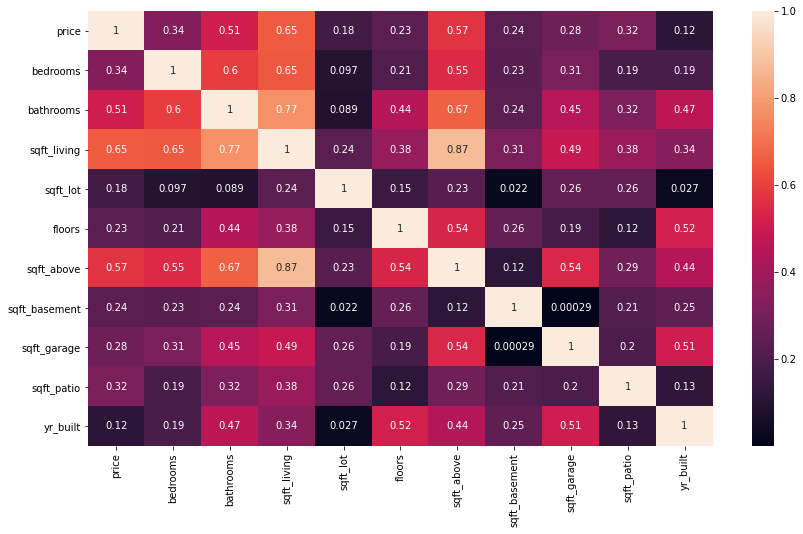

In [5]:
# Examine absolute correlation coefficients between numeric variables
numerical_categories = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                        'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio','yr_built']

fig, ax = plt.subplots(figsize = (14, 8))
sns.heatmap(every_column_df[numerical_categories].corr().abs(), annot = True, ax = ax);

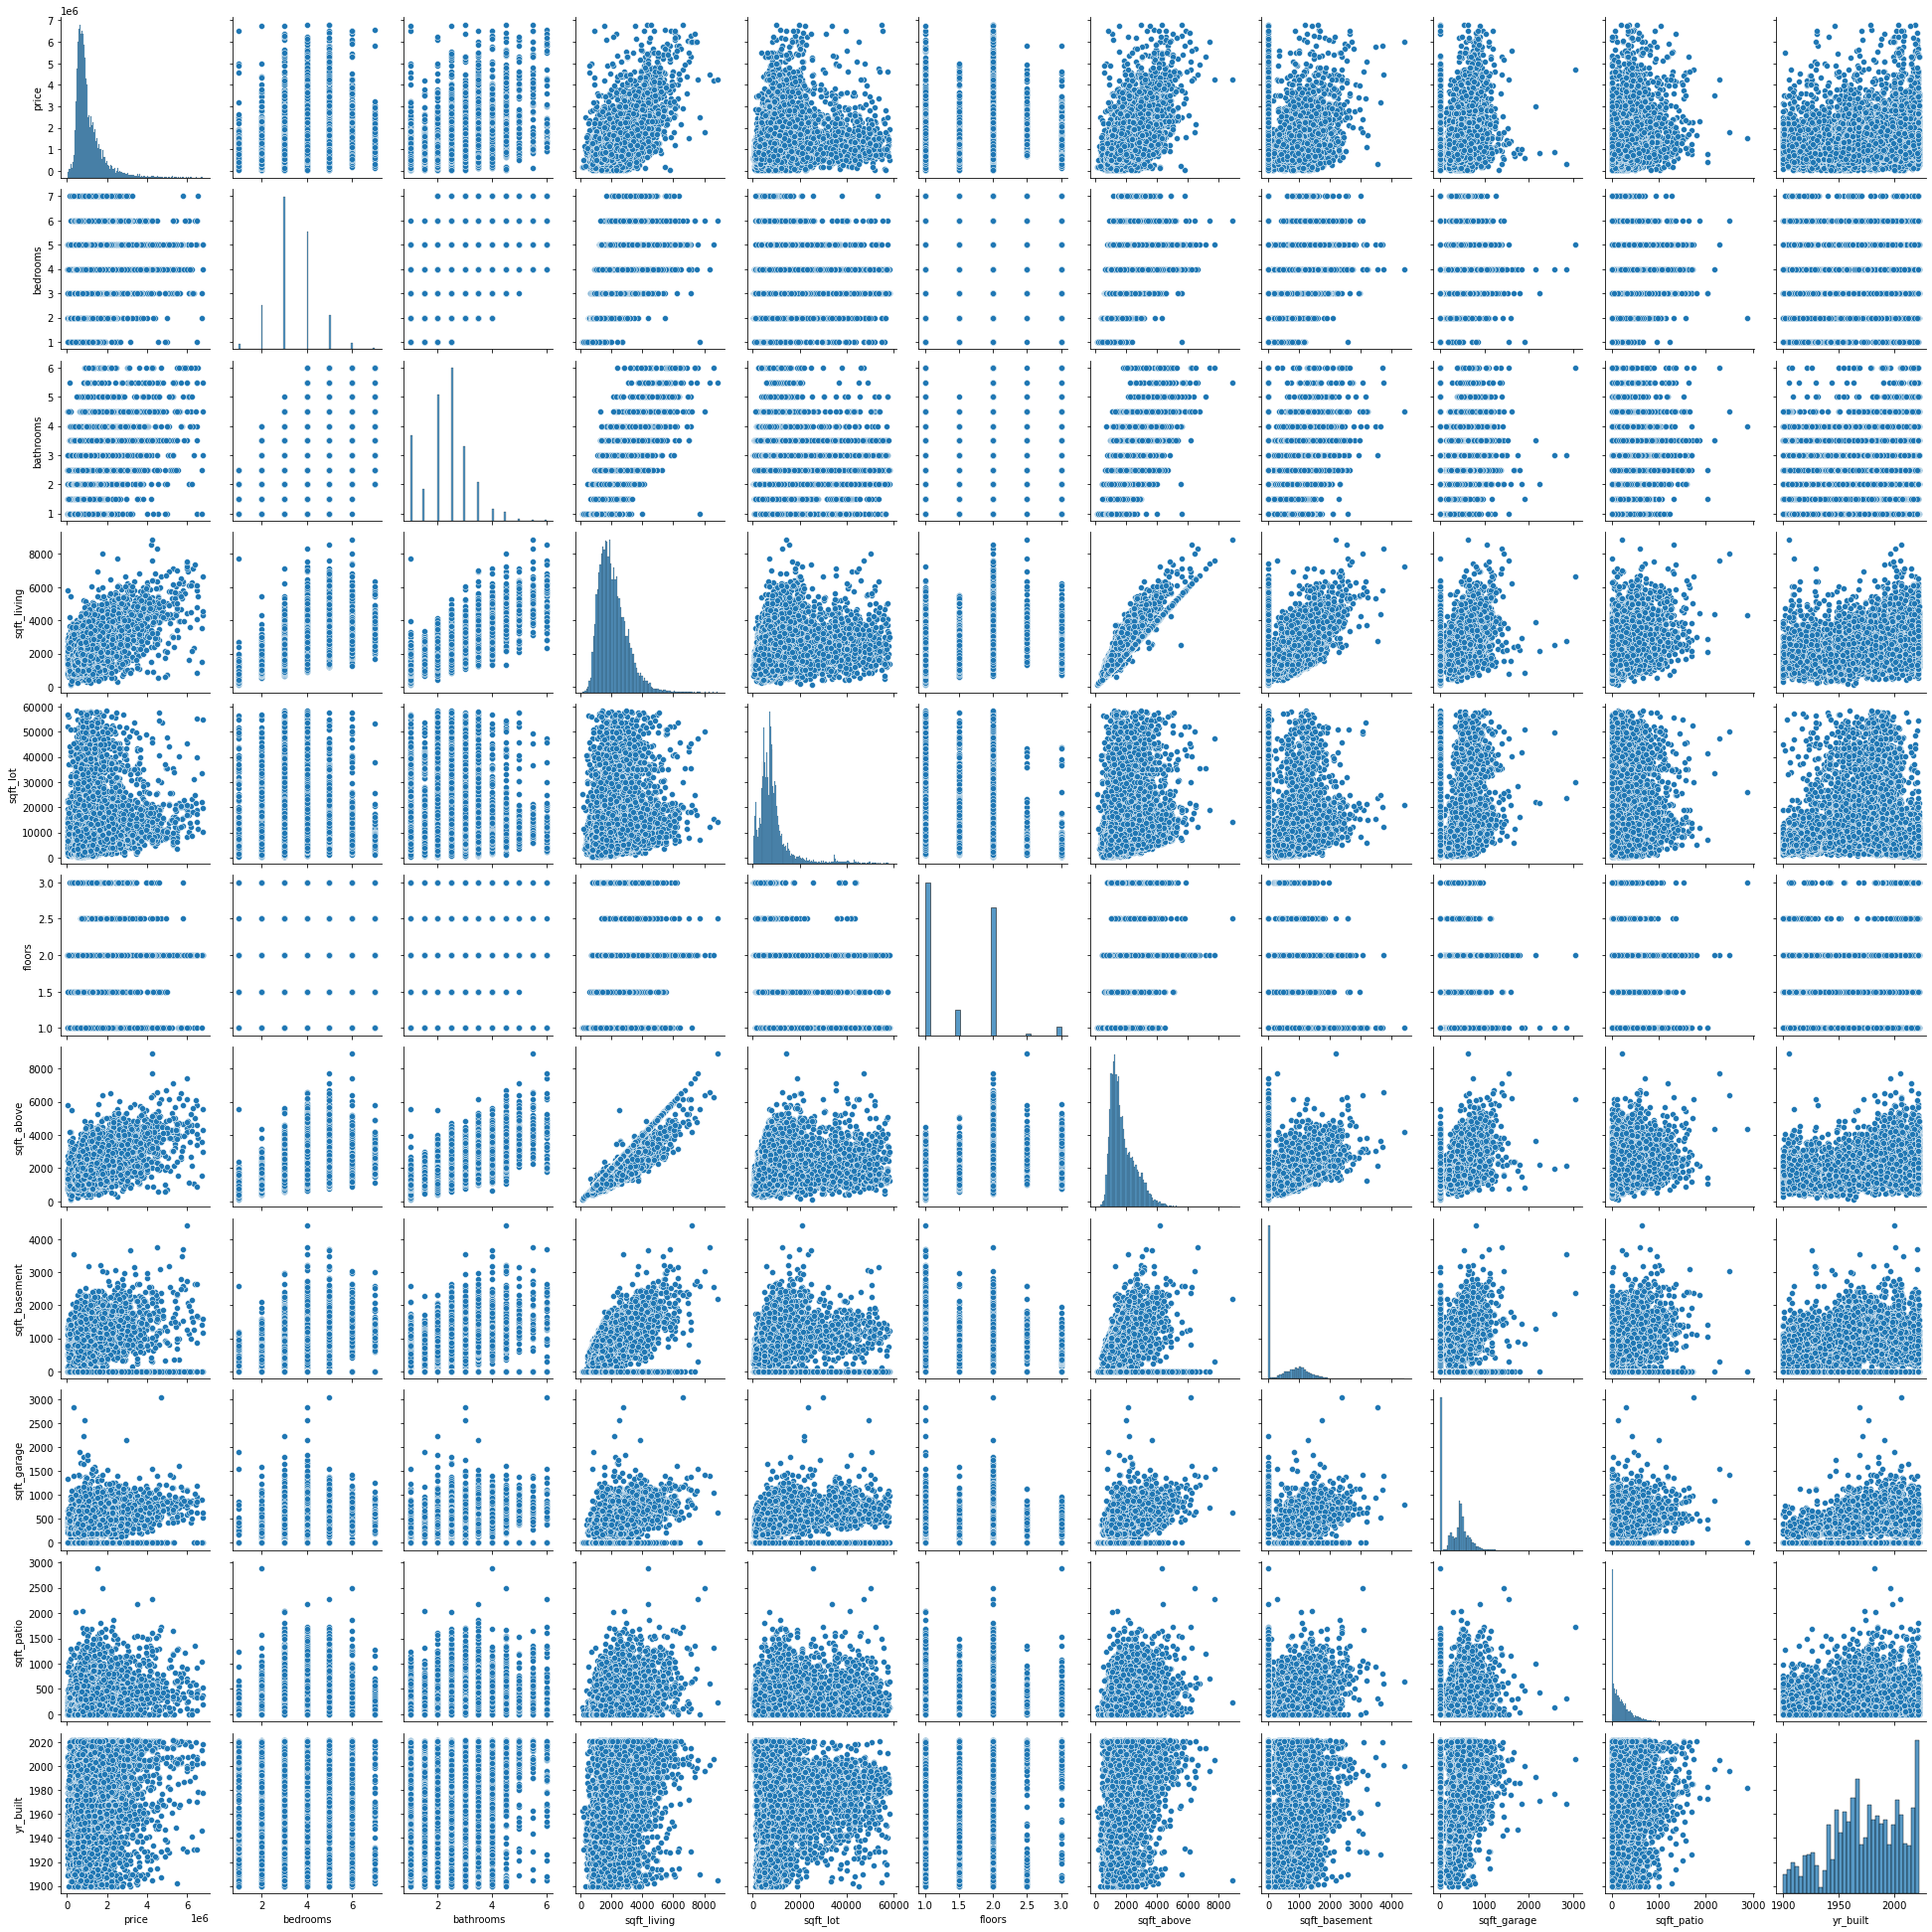

In [6]:
sns.pairplot(every_column_df[numerical_categories])

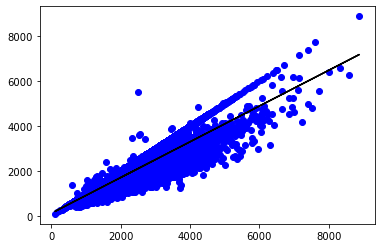

In [13]:
regressor = LinearRegression()
regressor.fit(every_column_df.sqft_living.values[:,np.newaxis], every_column_df.sqft_above)
y_reg = regressor.predict(every_column_df.sqft_living.values[:,np.newaxis])

plt.scatter(every_column_df.sqft_living, every_column_df.sqft_above, c = 'b');
plt.plot(every_column_df.sqft_living, y_reg, c = 'k');

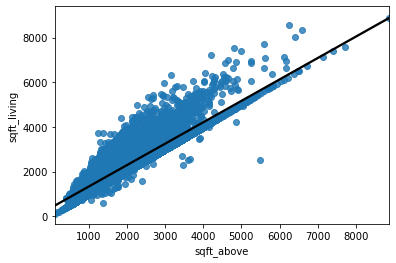

In [25]:
sns.regplot(x = every_column_df.sqft_above, y = every_column_df.sqft_living, ci=95, line_kws = {'color':'k'});

In [24]:
print(sm.OLS(every_column_df.sqft_living, sm.add_constant(every_column_df.sqft_above)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            sqft_living   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 5.927e+04
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:29:02   Log-Likelihood:            -1.4011e+05
No. Observations:               18630   AIC:                         2.802e+05
Df Residuals:                   18628   BIC:                         2.802e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        376.1677      7.788     48.300      0.0

In [23]:
stats.ttest_ind(every_column_df.sqft_above, every_column_df.sqft_living, equal_var = False)

Ttest_indResult(statistic=-33.36298259838299, pvalue=1.7842173187511198e-240)

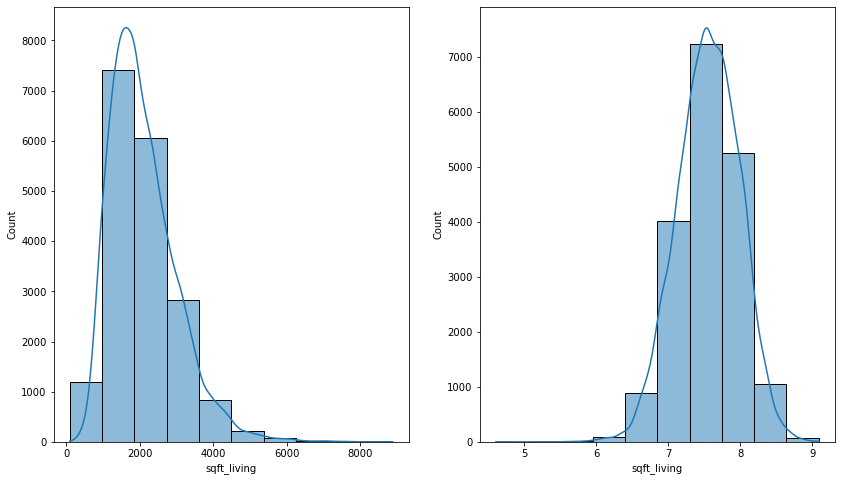

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (14, 8))
sns.histplot(every_column_df.sqft_living, bins = 10, kde = True, ax = ax[0]);
sns.histplot(np.log(every_column_df.sqft_living), bins = 10, kde = True, ax = ax[1]);